# NLP Going Deeper 3 : 텍스트의 분포로 벡터화하기

오늘은 단어의 빈도를 이용해서 텍스트를 표현하는 방법들과 텍스트의 분포를 이용해서 텍스트를 토큰화하는 방법에 대해서 배워보겠습니다. 오늘 다루게 되는 방법들은 Word2Vec 같은 임베딩을 활용한 분산 표현을 학습하는 기법이 대중화되기 이전에 많이 쓰이던 방법들입니다. 하지만 텍스트의 분포를 활용해서 텍스트를 벡터화하는 아이디어의 발전사를 통해 기초적인 개념을 잘 다져볼 수 있을 것입니다.

**이 노드에서 학습하게 되는 내용은 아래와 같습니다.**

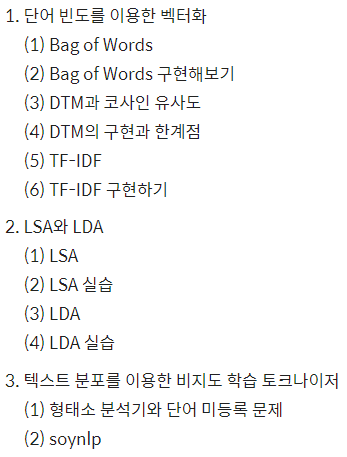

**본격적인 내용을 들어가기에 앞서 작업환경을 구성해 줍니다.**

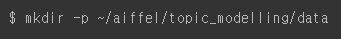

## Bag of Words 개념

머신러닝 모델은 기계이기 때문에, 텍스트보다는 수치화된 숫자를 더 잘 처리할 수 있습니다. 이런 이유로 기계가 자연어 처리를 원활히 할 수 있도록, 자연어 처리에서는 전처리 과정에서 텍스트를 숫자 벡터로 변환하는 벡터화(Vectorization) 라는 과정을 거치게 됩니다.

벡터화 방법으로는 크게 **(1) 통계와 머신 러닝을 활용한 방법**, 그리고 **(2) 인공 신경망을 활용하는 방법** 두 가지로 나눠볼 수 있는데요. 인공 신경망을 활용하는 방법은 다음에 배워보도록 하고, 오늘은 **전자의 방법(통계와 머신러닝을 활용한 방법)을 통해 벡터화하는 방법에 대해서 배워보겠습니다.**

**Bag of Words는 자연어 처리(Natural Language Processing)나 정보 검색(Information Retrieval)에서 쓰이는 매우 간단한 단어 표현 방법으로, 문서 내의 단어들의 분포를 보고 이 문서의 특성을 파악하는 기법입니다.** 줄여서 간단히 BoW라고 표기하기도 합니다.

아직은 설명이 아리송하지요? 조금 더 쉽게 설명해볼게요. Bag of Words는 직역하면 "단어들의 가방"입니다. **Bag of Words는 문서를 아래 그림과 같이 단어들의 가방으로 가정합니다.**

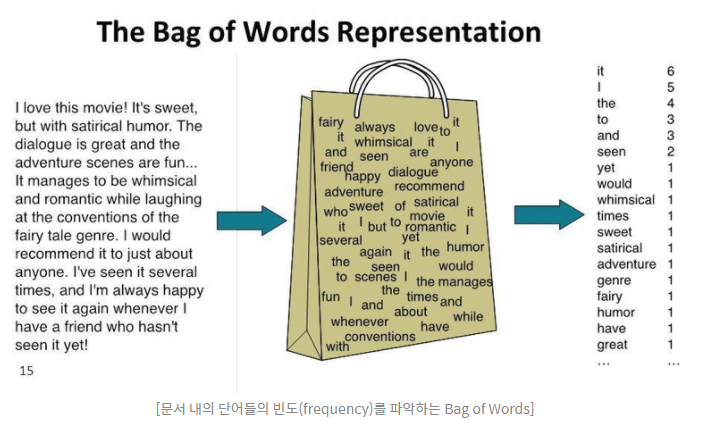

어떤 한 문서에 등장하는 텍스트를 전부 단어 단위로 토큰화(tokenization)를 합니다. 그러면 이제 수많은 단어들이 나올 텐데, 이 단어들을 전부 가방에 집어넣습니다. 그리고 이 가방을 마구 흔들어줍니다. 그렇게 되면 단어들의 순서는 무시되고 전부 섞이게 되겠지요?

그리고 문서에 사과라는 단어가 6번 등장했다면, 이 가방에는 사과라는 단어가 6개 있을 것입니다. **Bag of Words는 중복을 제거하지 않고, 단어들을 카운트합니다. 결론적으로 Bag of Words는 단어들의 순서는 무시하고, 단어들의 빈도 정보는 그대로 보존합니다.**

**doc1** = 'John likes to watch movies. Mary likes movies too.'

**doc2** = 'Mary also likes to watch football games.'

위 두 문장을 BoW로 표현한 결과는 다음과 같으며, 문서 내 단어의 순서는 고려하지 않습니다.

**BoW1** = {"John":1, "likes":2, "to":1, "watch":1, "movies":2, "Mary":1, "too":1}

**BoW2** = {"Mary":1, "also":1, "likes":1, "to":1, "watch":1, "football":1, "games":1}

위의 BoW에서 각 key는 단어, 각 value는 각 단어가 주어진 문서에 등장한 횟수를 나타내고, 문서 내 단어의 순서는 중요하지 않습니다. 그렇기 때문에 아래의 BoW3는 BoW1과 본질적으로 동일합니다.

**BoW3** = {"too":1, "Mary":1, "movies":2, "John":1, "watch":1, "likes":2, "to":1}

여기에서 Bag of Words의 한계점이 나타납니다. **단어의 순서가 고려되지 않다 보니, I eat lunch. 와 Lunch eat I. 가 서로 같은 문장이 되어 버리는 문제점이 발생합니다.** (후자는 의미상 어긋나는 문장입니다.)

이렇듯 어순에 따라 달라지는 의미를 충분히 반영하지 못하는 한계를 가지고 있습니다.

## Bag of Words 구현

**텐서플로우 케라스와 사이킷런 라이브러리를 사용해 Bag of Words를 구현해 보겠습니다.**

### Tensorflow Keras Tokenizer

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentence) # 단어장 생성
bow = dict(tokenizer.word_counts) # 각 단어와 각 단어의 빈도를 bow에 저장

print("Bag of Words :", bow) # bow 출력
print('단어장(Vocabulary)의 크기 :', len(tokenizer.word_counts)) # 중복을 제거한 단어들의 개수

Bag of Words : {'john': 1, 'likes': 3, 'to': 2, 'watch': 2, 'movies': 2, 'mary': 2, 'too': 1, 'also': 1, 'football': 1, 'games': 1}
단어장(Vocabulary)의 크기 : 10


### scikit-learn CountVectorizer

Bag of Words를 만드는 또 다른 방법은 사이킷런의 CountVectorizer를 사용하는 것입니다.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

sentence = ["John likes to watch movies. Mary likes movies too! Mary also likes to watch football games."]

vector = CountVectorizer()
bow = vector.fit_transform(sentence).toarray()

print('Bag of Words : ', bow) # 코퍼스로부터 각 단어의 빈도수를 기록한다.
print('각 단어의 인덱스 :', vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

Bag of Words :  [[1 1 1 1 3 2 2 2 1 2]]
각 단어의 인덱스 : {'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


CounterVectorizer의 vector.fit_transform(입력 문장).toarray()으로 출력되는 Bag of Words 결과를 보면 각 단어의 빈도만 출력될 뿐, 어떤 단어의 빈도인지는 나오지 않습니다. [[1 1 1 1 3 2 2 2 1 2]]이라는 값만으로는 각 숫자가 어떤 단어의 빈도인지 알 수가 없지요?

이는 vector.vocabulary_를 통해서 각 단어에 부여된 인덱스를 확인하면 되는데요. 주의할 점은 이 인덱스는 0부터 시작한다는 점입니다. 가령, also의 인덱스는 0이네요. 그런데 BoW에서 0번째 위치한 값은 1이니까, also의 빈도는 1입니다. 또는 likes의 인덱스는 4인데, BoW에서 4번째 위치한 값은 3이니까 likes의 빈도는 3이 됩니다.

다른 예시로 movies의 인덱스는 6인데, BoW에서 6번째 위치한 값은 2이므로 movies의 빈도는 2가 됩니다!

**아래와 같은 방법으로 Bag of Words의 단어장의 크기를 구할 수 있습니다.**

In [4]:
print('단어장(Vocabulary)의 크기 :', len(vector.vocabulary_))

단어장(Vocabulary)의 크기 : 10


단어장이라는 개념은 Bag of Words를 위해 사용되는 개념이라기보다는, 자연어 처리에서 보편적으로 쓰이는 용어입니다. 그런데 이를 계속 강조하는 이유는 지금부터 사용할 **DTM(Document-Term Matrix) 이라는 개념 이해를 돕기 위해서**입니다. 지금 Bag of Words를 배우면서 이런 생각이 들지 않으셨나요? 그래서 이 개념을 도대체 어디서 사용할 수 있다는 거지? 이를 이해하기 위해서 DTM으로 가보겠습니다!

## DTM과 코사인 유사도와의 관계

**DTM(Document-Term Matrix) 은 직역하면 문서-단어 행렬**입니다. D**TM은 여러 문서의 Bag of Words를 하나의 행렬로 구현한 것**인데요. 다시 말해 DTM은 **각 문서에 등장한 단어의 빈도수를 하나의 행렬로 통합**시킵니다. DTM은 문서를 행으로, 단어를 열로 가지는 행렬이지만, 문헌에 따라서는 열을 문서로 하고 단어를 행으로 하여 TDM(Term-Document Matrix) 이라고 부르기도 합니다.

예를 들어, 아래와 같은 3개의 문서가 있다고 해보겠습니다.

**Doc 1**: Intelligent applications creates intelligent business processes

**Doc 2**: Bots are intelligent applications

**Doc 3**: I do business intelligence

이 3개의 문서로부터 얻을 수 있는 DTM은 아래와 같습니다.

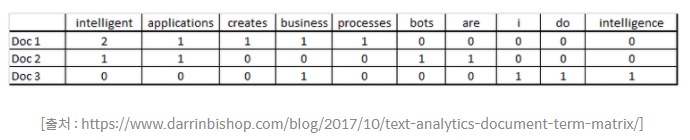

위의 DTM을 보면 각 행은 각 문서를 나타내고 있습니다. 그리고 각 열은 문서 3개의 통합 단어장(Vocabuary)에 있는 단어들로 구성되어져 있습니다. 이렇게 구성하면 앞서 문서 1개로 BoW를 만들었을 때와는 달리, 각 행은 많은 값이 0으로 구성이 됩니다.

이때 각 행을 문서 벡터(document vector), 열을 단어 벡터(word vector)라고 부를 수 있는데요. 문서의 수가 많아지면 많아질수록, 통합 단어장의 크기도 커지게 되어서 DTM은 결국 문서 벡터와 단어 벡터 모두 대부분의 값이 0이 되는 성질을 가지고 있습니다.

여러 문서들로 DTM을 만들었다면, 이제 Bag of Words로 무엇을 할 수 있는지를 이해할 차례입니다. DTM을 사용하면 각 문서들을 비교하고, 각 문서 간 유사도를 구할 수 있게 됩니다. 예를 들어볼까요?

**문서1** : I like dog

**문서2** : I like cat

**문서3** : I like cat I like cat

위와 같이 3개의 문서가 있다고 해볼게요. 각 단어에 대한 인덱스를 cat은 0, dog는 1, I는 2, like는 3이라고 했을 때 생성되는 DTM의 형태는 아래와 같습니다.

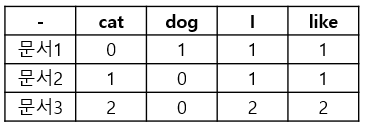

이제 각 문서 벡터의 유사도를 구해보겠습니다. 저자는 **가장 보편적으로 사용되는 유사도 계산 방법인 코사인 유사도**를 택했습니다. 아래와 같이 각 문서 벡터와 코사인 유사도 함수를 정의합니다.

In [5]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

doc1 = np.array([0,1,1,1]) # 문서1 벡터
doc2 = np.array([1,0,1,1]) # 문서2 벡터
doc3 = np.array([2,0,2,2]) # 문서3 벡터

def cos_sim(A, B):
    return dot(A, B)/(norm(A)*norm(B))

**여기서 잠시, 코사인 유사도가 무엇인지 살펴보고 가겠습니다.**

코사인 유사도는 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 두 벡터의 유사도를 의미합니다. 두 벡터의 방향이 완전히 동일한 경우에는 1의 값을 가지며, 90°의 각을 이루면 0, 180°로 반대의 방향을 가지면 -1의 값을 갖게 됩니다. 즉, 결국 코사인 유사도는 -1 이상 1 이하의 값을 가지며 값이 1에 가까울수록 유사도가 높다고 판단할 수 있습니다. 이를 직관적으로 이해하면 두 벡터가 가리키는 방향이 얼마나 유사한가를 의미합니다.

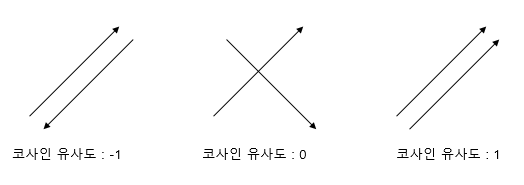

위 함수정의 코드에서 사용된 문서 벡터를 가지고 코사인 유사도를 각각 구하여 보면 다음과 같습니다.
숫자의 매끄러움을 위해 round 함수를 적용하여 소수점 둘째 자리까지 나타냅니다.

In [8]:
print(cos_sim(doc1, doc2)) # 문서 1과 문서 2의 코사인 유사도
print(cos_sim(doc1, doc3)) # 문서 1과 문서 3의 코사인 유사도
print(cos_sim(doc2, doc3)) # 문서 2와 문서 3의 코사인 유사도

0.6666666666666667
0.6666666666666667
1.0000000000000002


In [9]:
# 소수점 둘째 자리까지 나타내기
b1 = cos_sim(doc1, doc2).round(2)
b2 = cos_sim(doc1, doc3).round(2)
b3 = cos_sim(doc2, doc3).round(2)

print(b1, b2, b3)

0.67 0.67 1.0


눈여겨볼만한 점은 문서1과 문서2의 코사인 유사도와 문서1과 문서3의 코사인 유사도가 같다는 점과 문서2와 문서3의 코사인 유사도가 1이 나온다는 것입니다. 앞서 1은 두 벡터의 방향이 완전히 동일한 경우에 1이 나오며, 코사인 유사도 관점에서는 유사도의 값이 최대임을 의미한다고 언급한 바 있습니다.

문서3은 문서2에서 단지 모든 단어의 빈도수가 1씩 증가했을 뿐입니다. 다시 말해 한 문서 내의 모든 단어의 빈도수가 동일하게 증가하는 경우에는 기존의 문서와 코사인 유사도의 값이 1이라는 것입니다. 이것이 시사하는 점은 무엇일까요? 코사인 유사도를 사용하지 않는다고 가정하였을 때, 문서 A에 대해서 모든 문서와의 유사도를 구한다고 가정해봅시다. 다른 문서들과 문서 B나 거의 동일한 패턴을 가지는 문서임에도 문서 B가 단순히 다른 문서들보다 원문 길이가 긴 문서라는 이유로 (단어의 빈도수가 일정하게 더 높아질 때) 다른 문서들보다 유사도가 더 높게 나온다면 이는 우리가 원하는 결과가 아닙니다. 코사인 유사도는 문서의 길이가 다른 상황에서 비교적 공정한 비교를 할 수 있도록 도와줍니다.

이는 코사인 유사도는 유사도를 구할 때, 벡터의 크기가 아니라 벡터의 방향(패턴)에 초점을 두기 때문입니다. 코사인 유사도가 벡터의 유사도를 구하는 또 다른 방법인 내적과 가지는 차이점입니다.

문서1과 문서2의 코사인 유사도는 0.67, 문서1과 문서3의 코사인 유사도 또한 0.67입니다. 그런데 문서2와 문서3의 코사인 유사도는 1입니다. 이는 한 문서 내의 모든 단어의 빈도수가 똑같이 증가하는 경우에는 기존의 문서와 코사인 유사도의 값이 1이 되기 때문입니다.

## DTM의 구현과 한계점

사이킷런의 CountVectorizer를 이용하여 DTM을 만드는 방법은 앞서 Bag of Words를 만드는 방법과 동일합니다. 단지, 다수의 문서를 입력값으로 준다는 것이 다릅니다. 다음은 3개의 문서에 대해서 DTM을 만드는 과정을 보여줍니다.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'John likes to watch movies',
    'Mary likes movies too',
    'Mary also likes to watch football games',    
]
vector = CountVectorizer()

print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도수를 기록.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 0 0 1 1 0 1 1 0 1]
 [0 0 0 0 1 1 1 0 1 0]
 [1 1 1 0 1 1 0 1 0 1]]
{'john': 3, 'likes': 4, 'to': 7, 'watch': 9, 'movies': 6, 'mary': 5, 'too': 8, 'also': 0, 'football': 1, 'games': 2}


이쯤에서 DTM의 성질을 정리해보도록 하겠습니다.

DTM은 bag of words 기반으로 문서를 비교할 수 있는 행렬입니다.

그런데 **DTM은 두 가지 한계점을 지닙니다.**

- 먼저, DTM에서 문서의 수와 단어의 수가 계속 늘어날수록, 행과 열은 대부분의 값이 0을 가진다는 특징이 있습니다. 이는 저장 공간 측면에서 낭비입니다. (워드 임베딩 챕터에서 배우겠지만, 지나친 차원의 크기는 차원의 저주라는 또 다른 문제를 발생시킵니다.)

- 두 번째 한계점은 단어의 빈도에만 집중하는 방법 자체의 한계입니다. 예를 들어, 영어 데이터를 가지고 DTM을 만들었을 때, 불용어 'the'는 어떤 문서에서도 자주 등장하는 경향이 있습니다. 그런데 문서1과 문서2에서 둘 다 'the'가 많이 등장했다고 하여 이 두 문서가 유사한 문서라고 봐도 될까요?

- 사실 여러 문서에는 중요한 단어와 중요하지 않은 단어들이 혼재되어 있는데, 'the'와 같이 아무 문서에나 자주 등장하는 단어들은 문서끼리 비교할 때 그다지 도움이 되지 않습니다. 그렇다면 중요한 단어와 중요하지 않은 단어에 가중치를 따로 선별해서 주는 방법은 없을까요?

## TF-IDF

각 단어의 중요도를 판단하여 가중치를 주는 방법인 TF-IDF에 대해서 알아봅시다.
**TF-IDF는 모든 문서에서 자주 등장하는 단어는 중요도가 낮다고 판단하며, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단하는 것입니다.**

TF-IDF는 Term Frequency-Inverse Document Frequency의 약자입니다. 한국어로 해석하면 '단어 빈도-역문서 빈도' 입니다. 추측하건대, '단어의 빈도' 와 '문서의 빈도의 역수' 를 활용하는 것 같습니다.

TF-IDF는 불용어처럼 중요도가 낮으면서 모든 문서에 등장하는 단어들이 노이즈가 되는 것을 완화해 줍니다. 주의할 점은 TF-IDF를 사용하는 것이 DTM을 사용하는 것보다 성능이 항상 뛰어나지는 않다는 점입니다. TF-IDF를 사용하기 위해서는 우선 DTM을 만든 뒤에 TF-IDF 가중치를 DTM에 적용합니다.

단어의 빈도를 의미하는 TF는 사실 이미 배웠습니다. DTM이 이미 TF 행렬이기 때문이죠! 그리고 DTM의 각 단어에 IDF 값을 곱해주면 TF-IDF 행렬이 완성됩니다.

**TF-IDF의 수식은 다음과 같습니다.**

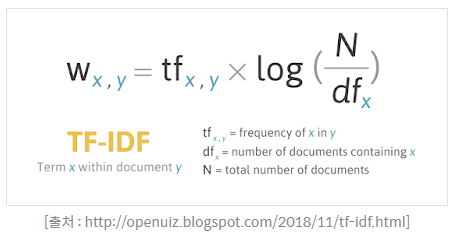

위의 이미지는 y는 문서, x는 단어라고 할 때 TF-IDF의 수식을 보여줍니다. TF는 앞서 설명했듯이 각 문서에 등장하는 단어의 빈도를 의미하므로 DTM을 만들면 자연스럽게 해결됩니다.

위의 수식에서 TF 뒤에 곱해지는 log항이 IDF입니다. TF를 구하는 방법은 알겠는데, **역문서 빈도인 IDF는 어떻게 구할까요?**

아래 예시문항을 통해 이해해 봅니다.

**Question. 전체 문서의 수가 5개라고 해봅시다. 그리고 단어 'like'가 문서2에서 200번, 문서 3에서 300번 등장했다고 해봅시다. 다른 문서에서 단어 'like'는 등장하지 않았습니다. 이때, 단어 'like'의 IDF는 몇일까요?**

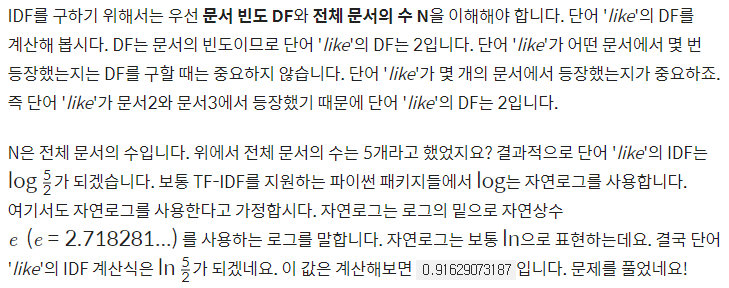

우리는 위 문제에서 IDF를 구하는 방법을 알아보았습니다. 이제 **TF-IDF도 구할 수 있을까요?**

**Question. 문서2과 문서3에서의 단어 'like'의 TF-IDF값은 몇 일까요?**

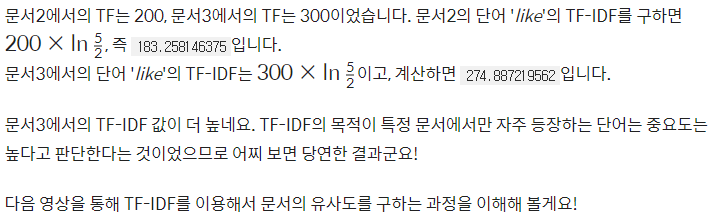

관련 유튜브 링크 : https://www.youtube.com/watch?v=Rd3OnBPDRbM

## TF-IDF 구현

In [11]:
from math import log
import pandas as pd
print('import completed.')

import completed.


노드에서는 3개의 문서를 사용하고 있습니다.

In [12]:
docs = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',  
]

우선 DTM의 열을 만들기 위해서 문서 3개의 단어들이 모두 들어간 통합 단어장을 만들겠습니다.

In [13]:
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
print('단어장의 크기 :', len(vocab))
print(vocab)

단어장의 크기 : 13
['James', 'John', 'Mary', 'TV', 'also', 'and', 'football', 'games', 'likes', 'movies', 'to', 'too', 'watch']


현재 단어장의 크기는 13이네요. **중복을 제거한 단어들의 개수가 13개라는 의미입니다.** 이제 총 문서의 수를 변수 N에다가 저장하겠습니다. 우리는 이미 이 값이 3이라는 사실을 알고 있지요?

In [14]:
N = len(docs) # 총 문서의 수
N

3

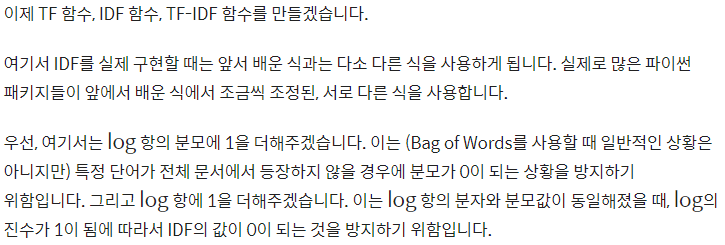

In [15]:
def tf(t, d):
    return d.count(t)
 
def idf(t):
    df = 0
    for doc in docs:
        df += t in doc    
    return log(N/(df + 1)) + 1
 
def tfidf(t, d):
    return tf(t,d)* idf(t)

- **Step 1. 방금 정의한 TF 함수를 사용하여 DTM 만들기**

In [16]:
result = []
for i in range(N): # 각 문서에 대해서 아래 명령을 수행
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tf(t, d))
        
tf_ = pd.DataFrame(result, columns = vocab)
tf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0,1,1,0,0,1,0,0,2,2,2,1,1
1,1,0,0,1,0,0,0,0,1,0,1,0,1
2,0,0,1,0,1,0,1,1,1,0,1,0,1


- **Step 2. 각 단어의 IDF 구하기**

In [17]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns=["IDF"])
idf_

,IDF
James,1.405465
John,1.405465
Mary,1.000000
TV,1.405465
also,1.405465
and,1.405465
football,1.405465
games,1.405465
likes,0.712318
movies,1.405465


IDF는 'likes'나 'to' 그리고 'watch'와 같이 모든 문서에 등장한 단어가 가장 낮은 값을 가집니다. 그리고 그다음으로 두 개의 문서에 등장한 'Mary'가 그다음으로 낮은 값을 가지며, 그 외의 1개의 문서에만 등장한 단어들은 가장 높은 값을 가지는 것을 볼 수 있습니다. 이제 TF-IDF 행렬을 출력해봅시다. **DTM에 있는 각 단어의 TF에 각 단어의 IDF를 곱해준 값입니다.**

- **Step 3. TF-IDF 구하기**

In [18]:
result = []
for i in range(N):
    result.append([])
    d = docs[i]
    for j in range(len(vocab)):
        t = vocab[j]
        
        result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,James,John,Mary,TV,also,and,football,games,likes,movies,to,too,watch
0,0.000000,1.405465,1.0,0.000000,0.000000,1.405465,0.000000,0.000000,1.424636,2.81093,1.424636,1.405465,0.712318
1,1.405465,0.000000,0.0,1.405465,0.000000,0.000000,0.000000,0.000000,0.712318,0.00000,0.712318,0.000000,0.712318
2,0.000000,0.000000,1.0,0.000000,1.405465,0.000000,1.405465,1.405465,0.712318,0.00000,0.712318,0.000000,0.712318


### scikit-learn TFidVectorizer

사이킷런으로 DTM을 만들기 위해서는 CountVectorizer를 사용했었습니다. 이와 유사하게 사이킷런에서는 TF-IDF를 자동으로 계산하여 출력하는 TfidfVectorizer를 제공합니다.

향후 실습 중에 결괏값이 예상과 달라 혼란이 일어나는 일이 없도록 미리 언급하자면, 사이킷런의 TfidfVectorizer 또한 이번에 배운 기본식에서 조정된 식을 사용합니다. 간단히 언급하면, TfidfVectorizer는 위에서 우리가 파이썬으로 구현한 식에서 더 나아가 loglog 항의 분자에도 1을 더해주며, TF-IDF의 결과에 L2 Norm까지 추가로 수행한다는 점이 다릅니다.

사이킷런의 TfidfVectorizer를 통해 TF-IDF 행렬을 출력해봅시다.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
  'John likes to watch movies and Mary likes movies too',
  'James likes to watch TV',
  'Mary also likes to watch football games',  
]

tfidfv = TfidfVectorizer().fit(corpus)
vocab = list(tfidfv.vocabulary_.keys()) # 단어장을 리스트로 저장
vocab.sort() # 단어장을 알파벳 순으로 정렬

# TF-IDF 행렬에 단어장을 데이터프레임의 열로 지정하여 데이터프레임 생성
tfidf_ = pd.DataFrame(tfidfv.transform(corpus).toarray(), columns = vocab)
tfidf_

,also,and,football,games,james,john,likes,mary,movies,to,too,tv,watch
0,0.000000,0.321556,0.000000,0.000000,0.000000,0.321556,0.379832,0.244551,0.643111,0.189916,0.321556,0.000000,0.189916
1,0.000000,0.000000,0.000000,0.000000,0.572929,0.000000,0.338381,0.000000,0.000000,0.338381,0.000000,0.572929,0.338381
2,0.464997,0.000000,0.464997,0.464997,0.000000,0.000000,0.274634,0.353642,0.000000,0.274634,0.000000,0.000000,0.274634


## LSA 개념

DTM과 TF-IDF 행렬같이 Bag of Words를 기반으로 한 표현 방법은 근본적으로 단어의 의미를 벡터로 표현하지 못한다는 한계를 가지고 있습니다.
가령, 일반적인 검색 작업에서 특정 단어들이 포함된 문서들을 단순히 찾아내는 것은 아주 빠르게 해낼 수 있습니다. 그런데 **특정 단어(단어의 의미)와 관련된 문서 집합(문서의 주제)을 찾아내고 싶다면 어떨까요? 단어들의 빈도가 아닌 의미와 주제를 알고 싶다면 어떻게 해야 할까요? 이는 DTM이나 TF-IDF 만으로는 풀기 어려운 문제입니다.** 이를 해결할 수 있는 LSA(Latent Semantic Analysis) 에 대해 알아봅시다.

LSA(잠재 의미 분석, Latent Semantic Analysis)은 전체 코퍼스에서 문서 속 단어들 사이의 관계를 찾아내는 자연어 처리 정보 검색 기술입니다.

LSA를 사용하면 단어와 단어 사이, 문서와 문서 사이, 단어와 문서 사이의 의미적 유사성 점수를 찾아낼 수 있습니다. 그리고 이 방법은 어떤 문서에서 특정 단어들의 빈도가 몇인지를 판단하는 것보다 효과적인 경우가 많습니다.

LSA를 이해하려면 먼저 선형대수학의 **특잇값 분해(Singular Value Decompotion)** 에 대해 이해할 필요가 있습니다. 우선 행렬에 대한 용어를 파악해보도록 합니다.

**링크 : https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-19-%ED%96%89%EB%A0%AC?category=1057680**

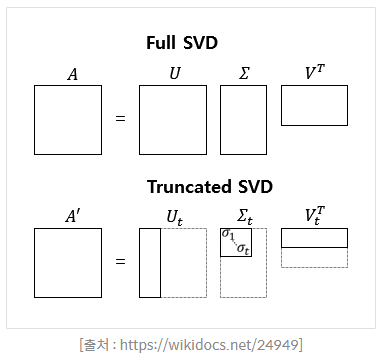

특잇값 분해(Singular Value Decomposition, SVD) 란 m × n 크기의 임의의 사각 행렬 A를 위의 그림의 Full SVD와 같이 특이 벡터(singular vector)의 행렬와 특잇값(singular value)의 대각행렬로 분해하는 것을 말합니다. 특잇값 분해를 좀 더 자세히 이해하기 위해서 [링크 1]을 도입부부터 '파이썬을 사용한 특이 분해'까지만 읽고 오겠습니다. 좀더 직관적이고 쉬운 설명이 필요하다면 그 아래의 동영상 링크를 함께 참고해 주세요.

**링크 1 : https://datascienceschool.net/02%20mathematics/03.04%20%ED%8A%B9%EC%9E%87%EA%B0%92%20%EB%B6%84%ED%95%B4.html**
**링크 2(동영상) : https://www.youtube.com/watch?v=vxJ1MzfvL5w**

특잇값 분해 중에서 조금 특별한 특잇값 분해가 있습니다. 특잇값 가운데 가장 큰(다시 말해, 가장 중요한) t개만 남기고 해당 특잇값에 대응되는 특이 벡터(singular vector) 들로 행렬 A를 근사(approximate) 하도록 하면, 이를 절단된 특잇값 분해(Truncated SVD) 라고 합니다.

Truncated SVD를 수행하면 행렬 Σ의 대각 원솟값 중에서 상윗값 t개만 남게 되며, U행렬과 V행렬의 t열까지만 남습니다. 이로 인해 세 행렬에서 값(정보)의 손실이 일어나 기존의 행렬 A를 정확히 복구할 수는 없게 됩니다.

여기서 t는 하이퍼파라미터입니다. 하이퍼파라미터란 사용자가 직접 값을 선택하며 성능에 영향을 주는 매개변수를 말합니다. t를 크게 잡으면 기존의 행렬 A로부터 다양한 의미를 가져갈 수 있지만, 노이즈를 제거하려면 t를 작게 잡아야 합니다.

### LSA와 Truncated SVD

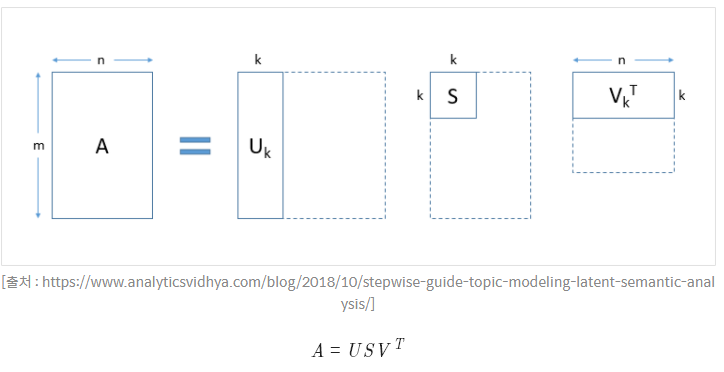

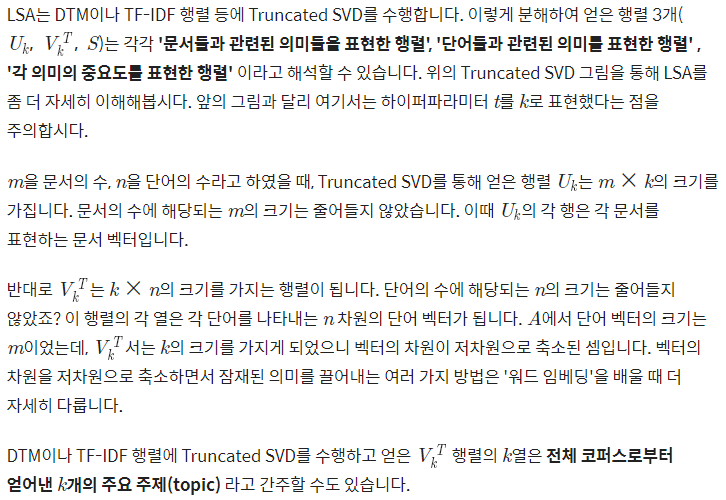

그렇다면, **텍스트 데이터로부터 k개의 주제를 얻어내는 LSA는 어떻게 구현할까?** 다음 스텝에서 살펴봅니다.

## LSA 실습

### 필요 라이브러리, 데이터 다운로드 및 확인

In [20]:
import pandas as pd
import numpy as np
import urllib.request
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
print('import completed.')

import completed.


혹시나 설치가 되어 있지 않을 경우에는 아래 코드를 입력 후 Run 시킴으로서 다운로드를 해주면 정상 작동하게 됩니다.

In [21]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /aiffel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /aiffel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

실습 데이터를 다운로드해봅니다.

In [22]:
import os

csv_filename = os.getenv('HOME')+'/aiffel/topic_modelling/data/abcnews-date-text.csv'

urllib.request.urlretrieve("https://raw.githubusercontent.com/franciscadias/data/master/abcnews-date-text.csv", 
                           filename=csv_filename)

('/aiffel/aiffel/topic_modelling/data/abcnews-date-text.csv',
 <http.client.HTTPMessage at 0x7f26b1cd04d0>)

다운로드한 데이터를 데이터 프레임에 저장하고 전체 샘플의 수를 출력합니다.

In [25]:
data = pd.read_csv(csv_filename, error_bad_lines=False)
data.shape

(1082168, 2)

무려 108만 개가 넘는 데이터 샘플이 존재하고 있습니다. 앞에 5개만 살펴봅니다.

In [26]:
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


우리는 현재 LSA를 실습하고 있으므로 publish_date는 이번 실습에 사용하지 않으니, **headline_text만 별도로 저장합니다.**

In [27]:
text = data[['headline_text']].copy()
text.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


중복되는 데이터가 있는지 **nunique()** 를 통해 확인해 봅니다.

In [28]:
text.nunique() # 중복을 제외하고 유일한 시퀀스를 가지는 샘플의 개수를 출력

headline_text    1054983
dtype: int64

중복을 제외하면 약 105만 개의 샘플이 존재합니다. 이는 약 3만 개의 샘플이 중복 샘플임을 의미합니다. 중복 샘플은 처리의 원활성을 위해 제거합니다.

In [29]:
text.drop_duplicates(inplace=True) # 중복 샘플 제거
text.reset_index(drop=True, inplace=True)
text.shape

(1054983, 1)

### 데이터 정제 및 정규화

이제 텍스트 데이터를 정제 및 정규화하는 과정을 진행해 보겠습니다. 우선 NLTK의 토크나이저를 이용해 전체 텍스트 데이터에 대해서 단어 토큰화를 수행하고, NLTK가 제공하는 불용어 리스트를 사용하여 불용어를 제거합니다.

아래 과정은 다소(몇 분 정도) 시간이 걸릴 수 있으니 당황하지 마세요.

In [30]:
# NLTK 토크나이저를 이용해서 토큰화
text['headline_text'] = text.apply(lambda row: nltk.word_tokenize(row['headline_text']), axis=1)

# 불용어 제거
stop_words = stopwords.words('english')
text['headline_text'] = text['headline_text'].apply(lambda x: [word for word in x if word not in (stop_words)])

text.head()

,headline_text
0,"[aba, decides, community, broadcasting, licence]"
1,"[act, fire, witnesses, must, aware, defamation]"
2,"[g, calls, infrastructure, protection, summit]"
3,"[air, nz, staff, aust, strike, pay, rise]"
4,"[air, nz, strike, affect, australian, travellers]"


이제 동일한 단어지만 다른 표현을 가지는 단어들을 하나의 단어로 통합(lemmatization)하는 단어 정규화 과정, 그리고 길이가 1 ~ 2인 단어를 제거하는 전처리를 진행합니다.

In [31]:
# 단어 정규화. 3인칭 단수 표현 -> 1인칭 변환, 과거형 동사 -> 현재형 동사 등을 수행한다.
text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

# 길이가 1 ~ 2인 단어는 제거.
text = text['headline_text'].apply(lambda x: [word for word in x if len(word) > 2])
print(text[:5])

0     [aba, decide, community, broadcast, licence]
1    [act, fire, witness, must, aware, defamation]
2       [call, infrastructure, protection, summit]
3            [air, staff, aust, strike, pay, rise]
4    [air, strike, affect, australian, travellers]
Name: headline_text, dtype: object


### 역토큰화 및 DTM 생성

DTM을 생성하는 CountVectorizer 또는 TF-IDF 행렬을 생성하는 TfidfVectorizer의 입력으로 사용하기 위해서 토큰화 과정을 역으로 되돌리는 역토큰화(detokenization) 를 수행해보겠습니다.

In [32]:
# 역토큰화 (토큰화 작업을 역으로 수행)
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(text[i])
    detokenized_doc.append(t)

train_data = detokenized_doc
print('역토큰화 구성 완료')

역토큰화 구성 완료


전처리 최종 결과는 train_data에 저장하였습니다. 5개의 샘플을 출력해봅시다.

In [33]:
train_data[:5]

['aba decide community broadcast licence',
 'act fire witness must aware defamation',
 'call infrastructure protection summit',
 'air staff aust strike pay rise',
 'air strike affect australian travellers']

전처리 최종 결과인 train_data는 다음에 배울 LDA 실습에서도 재사용 할 예정입니다. CountVectorizer를 사용하여 DTM을 생성해봅시다. 단어의 수는 5,000개로 제한하겠습니다.

In [34]:
# 상위 5000개의 단어만 사용
c_vectorizer = CountVectorizer(stop_words='english', max_features = 5000)
document_term_matrix = c_vectorizer.fit_transform(train_data)

DTM을 생성했습니다. DTM의 크기를 확인해봅시다. 참고로, **DTM의 크기(shape)는 (문서의 수 × 단어 집합의 크기)입니다.**

In [36]:
print('DTM 행렬의 크기 :',document_term_matrix.shape)

DTM 행렬의 크기 : (1054983, 5000)


### scikit-learn TruncatedSVD

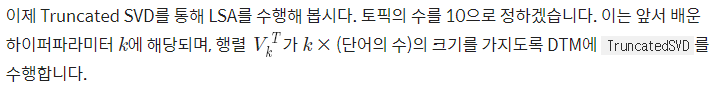

참고 링크 : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD.fit_transform

In [37]:
from sklearn.decomposition import TruncatedSVD

n_topics = 10
lsa_model = TruncatedSVD(n_components = n_topics)
lsa_model.fit_transform(document_term_matrix)

array([[ 1.20230958e-02, -3.67235232e-03,  1.81108437e-02, ...,
         2.70263987e-03,  5.90553811e-04,  1.56495661e-02],
       [ 2.89948014e-02, -1.10064268e-02,  1.81256171e-02, ...,
         8.05249383e-03, -8.78027704e-03, -2.65505139e-03],
       [ 5.02893008e-03, -2.01059677e-03,  9.75822929e-03, ...,
        -2.49146116e-03,  1.41987830e-03,  3.99478437e-03],
       ...,
       [ 2.96552907e-02,  4.03091311e-03,  2.46902458e-02, ...,
         2.50751684e-02,  1.31764021e-02,  2.81670335e-02],
       [ 6.12277930e-02, -9.99190732e-03,  1.35461076e-01, ...,
         8.18124862e-01,  9.26344171e-01, -2.11818864e-01],
       [ 7.08899941e-02,  3.10178375e-02, -1.34155537e-03, ...,
        -1.14288090e-02, -2.76306083e-02, -4.32149092e-03]])

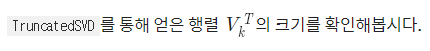

In [38]:
print(lsa_model.components_.shape)

(10, 5000)


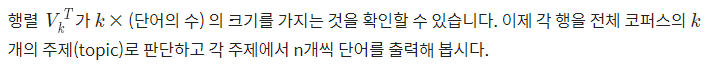

In [39]:
terms = c_vectorizer.get_feature_names() # 단어 집합. 5,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lsa_model.components_, terms)

Topic 1: [('police', 0.7464), ('man', 0.45355), ('charge', 0.21097), ('new', 0.14091), ('court', 0.11149)]
Topic 2: [('man', 0.69413), ('charge', 0.30053), ('court', 0.16806), ('face', 0.11427), ('murder', 0.10627)]
Topic 3: [('new', 0.83655), ('plan', 0.23654), ('say', 0.18255), ('govt', 0.11033), ('council', 0.10925)]
Topic 4: [('say', 0.73933), ('plan', 0.35767), ('govt', 0.16765), ('council', 0.12937), ('urge', 0.07817)]
Topic 5: [('plan', 0.73247), ('council', 0.17984), ('govt', 0.1391), ('urge', 0.08891), ('water', 0.06955)]
Topic 6: [('govt', 0.54742), ('urge', 0.26405), ('court', 0.2516), ('fund', 0.2011), ('face', 0.16649)]
Topic 7: [('charge', 0.52093), ('court', 0.4637), ('face', 0.37631), ('plan', 0.11307), ('murder', 0.09796)]
Topic 8: [('win', 0.63631), ('court', 0.38448), ('kill', 0.15329), ('crash', 0.09913), ('australia', 0.07765)]
Topic 9: [('win', 0.61962), ('charge', 0.48253), ('australia', 0.08951), ('cup', 0.08861), ('world', 0.08199)]
Topic 10: [('council', 0.855

## LDA 개념

앞서 LSA를 통해 전체 코퍼스로부터 주요 주제인 토픽을 찾아내는 실습을 해봤습니다. 이처럼 **문서의 집합에서 토픽을 찾아내는 프로세스를 토픽 모델링(Topic Modelling) 이라고 합니다.** 이는 고객의 소리와 같이 많은 문서에서 주요 주제를 알아내는 일이 중요할 때 사용합니다.

이제부터 배울 잠재 디리클레 할당(Latent Dirichlet Allocation, LDA) 은 토픽 모델링의 또 다른 대표적인 알고리즘입니다. 간단하게 얘기하자면, **LDA는 문서들이 토픽들의 혼합으로 구성되어 있으며, 토픽들은 확률 분포에 기반하여 단어들을 생성한다고 가정합니다. 그리고 데이터가 주어지면, LDA는 이 가정에 따라 단어들의 분포로부터 문서가 생성되는 과정을 역추적해 문서의 토픽을 찾아냅니다.**

### LDA(Latent Dirichlet Allocation) 시뮬레이션

**시뮬레이션 링크 : https://lettier.com/projects/lda-topic-modeling/**

LDA를 배우기에 앞서 LDA를 시뮬레이션해 보겠습니다.

위의 사이트는 별도의 코드 작성 없이 입력한 문서들로부터 DTM을 만들고 LDA를 수행한 결과를 보여주는 웹 사이트입니다. 위 사이트에 접속하여 다음과 같은 순서로 시뮬레이션을 진행해 주세요.

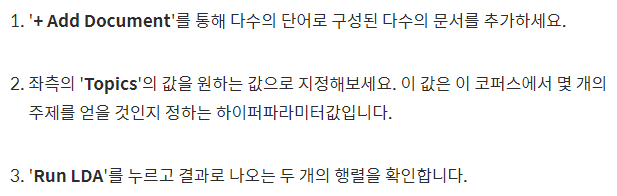

**직접 시뮬레이션한 결과는 아래와 같았다. (첫 번째 행렬의 경우, 아래에도 데이터가 더 있으나 크기상 편집했다.)**

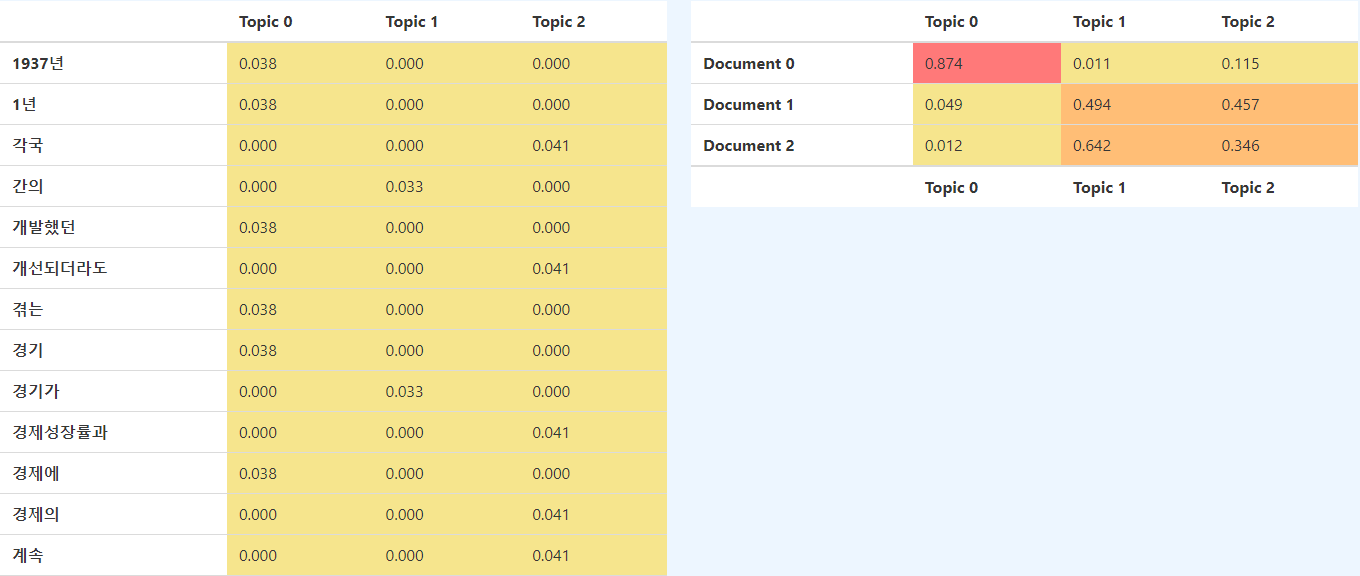

- **첫 번째 행렬** : 첫 번째 행렬의 행은 단어 집합의 단어들이고, 열은 Topic을 나타낸다.

- **두 번째 행렬** : 두 번째 행렬의 행은 문서이고, 열은 Topic을 나타낸다.

### LDA(Latent Dirichlet Allocation)의 두 가지 결과

위의 시뮬레이션을 통해 두 개의 행렬이 결과로서 나오는 것을 확인하셨나요? LDA는 각 토픽의 단어 분포와 각 문서의 토픽 분포를 추정해냅니다.

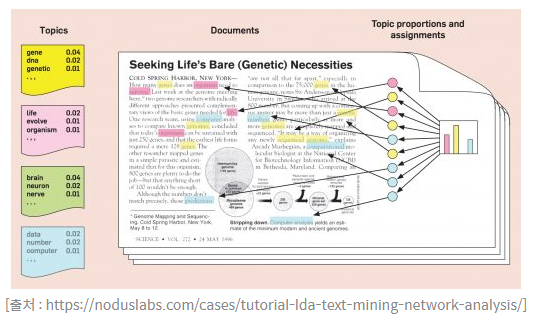

LDA는 각 토픽의 단어 분포, 즉 특정 토픽에 특정 단어가 나타날 확률을 추정합니다. 예를 들어, 위의 그림의 좌측에서 'Topics'라고 적혀져 있는 부분을 보겠습니다. 그중 초록색 토픽에는 'brain'이라는 단어가 등장할 확률이 0.04입니다.

이번에는 그림 중앙의 'Documents'라고 적혀져 있는 부분을 보겠습니다. 주어진 문서에는 노란색, 분홍색, 하늘색 토픽이라는 세 가지 토픽이 존재하는 것 같습니다. 언뜻 보기에 노란색 네모가 가장 많은 것 같습니다.

이번에는 그림 우측에 'Topic proportions and assignments'를 보겠습니다. 그 아래에 있는 막대그래프는 문서에 존재하는 토픽의 비율을 시각화한 그래프입니다. 이 문서에는 세 가지 토픽이 존재하는데, 노란색 토픽의 비중이 가장 큰 것 같습니다. 다시 말해 이 문서는 노란색 토픽의 단어들이 가장 많이 등장하고 있으며, 노란색 토픽일 가능성이 큽니다. 이렇게 LDA는 단어들의 분포로부터 해당 문서의 토픽 분포를 추정하게 됩니다.

### LDA의 가정

LDA는 전체 코퍼스, 즉 다수의 문서들로부터 토픽을 뽑아내기 위해서 하나의 가정을 염두에 두고 있습니다. 모든 문서 하나, 하나가 작성될 때 그 문서의 작성자는 아래와 같은 생각을 했다는 가정입니다.

**'나는 이 문서를 작성하기 위해서 이런 주제들을 넣을거고, 이런 주제들을 위해서는 이런 단어들을 넣을 거야.'**

아래 자료를 통해 LDA의 직관적인 이해를 도모해 봅니다.

**링크 : https://wikidocs.net/30708**

**링크에서 설명하는 LSA와 LDA의 매커니즘에 기반한 차이에 대해서 알아보겠습니다.**

LSA는 DTM을 차원 축소하여 축소 차원에서 근접 단어들을 토픽으로 묶는 반면에, LDA는 단어가 특정 토픽에 존재할 확률과 문서에 특정 토픽이 존재할 확률을 결합 확률로 추정하여 토픽을 추출합니다.

LDA 아키텍처에 대한 상세한 설명은 아래의 링크에서 동영상 강의로 대신하겠습니다.

**링크(30분 가량 소요) : https://serviceapi.nmv.naver.com/flash/convertIframeTag.nhn?vid=A008B9E1EAFC02C99F92928155487839090E&outKey=V1210ad4156cf64ce0c6a3e18cecaae499f6528784c999ca6541c3e18cecaae499f65&width=544&height=306**

## LDA 실습

LDA 실습은 LSA 실습 과정에서 만들어둔 전처리가 완료된 train_data를 재사용한다고 가정합니다. 해당 데이터는 역토큰화 과정을 거친 데이터입니다.

### TF-IDF 행렬 생성

LDA는 DTM 또는 TF-IDF를 입력으로 받을 수 있습니다. 여기서는 TF-IDF를 사용하겠습니다.

TfidfVectorizer를 사용하여 TF-IDF 행렬을 생성해봅시다. 단어의 수는 5,000개로 제한하겠습니다. TF-IDF 행렬을 생성한 후에는 행렬의 크기를 확인합시다.

In [40]:
# 상위 5,000개의 단어만 사용
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
tf_idf_matrix = tfidf_vectorizer.fit_transform(train_data)

# TF-IDF 행렬의 크기를 확인해봅시다.
print('행렬의 크기 :', tf_idf_matrix.shape)

행렬의 크기 : (1054983, 5000)


### scikit-learn LDA Model 활용

사이킷런의 LDA 모델을 사용하여 학습합니다. LSA와 마찬가지로 동일한 사이킷런 패키지이므로 앞으로 진행되는 실습 과정은 LSA와 매우 유사합니다. 토픽의 개수는 10개로 정했습니다. 이는 n_components의 인자값입니다. 시간이 수분 정도 소요될 것이므로 느긋하게 기다려 주세요.

In [41]:
from sklearn.decomposition import LatentDirichletAllocation

lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=777, max_iter=1)
lda_model.fit_transform(tf_idf_matrix)

array([[0.0335099 , 0.69841093, 0.0335099 , ..., 0.0335099 , 0.0335099 ,
        0.0335099 ],
       [0.03365631, 0.03365631, 0.03365631, ..., 0.03365631, 0.03365631,
        0.03365631],
       [0.0366096 , 0.0366096 , 0.0366096 , ..., 0.67051361, 0.0366096 ,
        0.0366096 ],
       ...,
       [0.02914502, 0.02914502, 0.14077174, ..., 0.02914502, 0.02914502,
        0.26688721],
       [0.02637829, 0.12325014, 0.02638944, ..., 0.21422895, 0.02637829,
        0.0996168 ],
       [0.03376121, 0.03376055, 0.03376055, ..., 0.03376055, 0.50437083,
        0.03376055]])

LDA를 통해 얻은 결과 행렬의 크기를 확인해봅시다.

In [42]:
print(lda_model.components_.shape)

(10, 5000)


전체 코퍼스로부터 얻은 10개의 토픽과 각 토픽에서의 단어의 비중을 살펴봅니다.

In [43]:
# LDA의 결과 토픽과 각 단어의 비중을 출력합시다
terms = tfidf_vectorizer.get_feature_names() # 단어 집합. 5,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n-1:-1]])

get_topics(lda_model.components_, terms)

Topic 1: [('new', 6839.37079), ('government', 6344.47105), ('election', 5419.59529), ('adelaide', 4864.1739), ('home', 4048.41226)]
Topic 2: [('say', 7929.44145), ('change', 4193.89405), ('year', 3924.88995), ('live', 3625.10473), ('market', 3541.15301)]
Topic 3: [('australian', 7667.75985), ('south', 4846.36918), ('perth', 4552.99622), ('2016', 3955.96018), ('open', 3771.68108)]
Topic 4: [('trump', 8187.32772), ('school', 3966.83143), ('jail', 3245.22756), ('women', 3029.28982), ('life', 2998.44275)]
Topic 5: [('police', 5589.78951), ('melbourne', 5299.84238), ('warn', 3577.31091), ('rural', 3521.5736), ('hospital', 3106.7779)]
Topic 6: [('world', 4536.54893), ('sydney', 4406.58731), ('country', 4167.71984), ('years', 3581.99631), ('man', 3520.89397)]
Topic 7: [('charge', 5946.75892), ('day', 5062.31785), ('house', 4481.76928), ('murder', 4065.57534), ('crash', 3793.50261)]
Topic 8: [('australia', 7253.84683), ('attack', 4787.62503), ('north', 3706.11788), ('state', 3658.17043), ('wes

## 텍스트 분포를 이용한 비지도 학습 토크나이저 : 형태소 분석기와 단어 미등록 문제

지금까지 띄어쓰기 단위의 단어 분포를 이용해서 단어나 문서를 벡터화하는 방법에 대해 알아봤습니다. 이번에는 텍스트의 분포를 이용해서 토큰화를 수행하는 비지도 학습 토크나이저에 대해서 알아봅시다.

### 형태소 분석기의 필요성

한국어는 교착어입니다. 교착어란 하나의 낱말(엄밀히는 하나의 어절)이 하나의 어근(root)(혹은 어간(stem))과 각각 단일한 기능을 가지는 하나 이상의 접사(affix)의 결합으로 이루어져 있는 언어를 말합니다. 조사라는 품사는 교착어에만 존재합니다.

이런 특성으로 인해 한국어는 영어와 달리 조사나 접사가 존재하며, 영어처럼 띄어쓰기 단위 토큰화가 제대로 동작하지 않습니다.

영어 토큰화를 복습해봅시다. 다음과 같이 영어 문장은 단순히 띄어쓰기를 수행해도 단어 토큰화가 제대로 동작합니다.

In [44]:
en_text = "The dog ran back to the corner near the spare bedrooms"
print(en_text.split())

['The', 'dog', 'ran', 'back', 'to', 'the', 'corner', 'near', 'the', 'spare', 'bedrooms']


그런데 한국어의 경우에는 띄어쓰기 단위로 토큰화를 하면 문제가 생깁니다. 다음과 같은 한국어 문장을 띄어쓰기 기준으로 토큰화를 진행했다고 해봅시다.

In [45]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사 왔어"
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사', '왔어']


위의 예제 문장에서 '사과'란 단어가 총 4번 등장했는데 모두 '의', '를', '가', '랑' 등이 붙어있어 이를 제거해주지 않으면 기계는 전부 다른 단어로 인식하게 됩니다. 이를 해결하기 위해서 한국어는 주로 형태소 분석기를 사용합니다. 가령, 형태소 분석기 중 하나인 Okt를 사용해서 형태소 분석을 할 경우에는 다음 결과를 얻습니다.

In [46]:
from konlpy.tag import Okt

tokenizer = Okt()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이라는', '글', '을', '봤어', '.', '그래서', '오늘', '사과', '를', '먹으려고', '했는데', '사과', '가', '썩어서', '슈퍼', '에', '가서', '사과', '랑', '오렌지', '사', '왔어']


### 단어 미등록 문제

하지만 기존의 형태소 분석기는 등록된 단어를 기준으로 형태소를 분류해 내어 새롭게 만들어진 단어를 인식하기 어렵다는 특징이 있습니다.

In [47]:
print(tokenizer.morphs('모두의연구소에서 자연어 처리를 공부하는 건 정말 즐거워'))

['모두', '의', '연구소', '에서', '자연어', '처리', '를', '공부', '하는', '건', '정말', '즐거워']


'모두의연구소'는 하나의 단어이지만 위의 형태소 분석 결과에서는 전부 분리된 결과를 보여줍니다.

그렇다면 텍스트 데이터에서 특정 문자 시퀀스가 함께 자주 등장하는 빈도가 높고, 앞뒤로 조사 또는 완전히 다른 단어가 등장하는 것을 고려해서 해당 문자 시퀀스를 형태소라고 판단하는 형태소 분석기라면 어떨까요?

예를 들어, '모두의연구소'라는 문자열이 자주 연결되어 등장한다면 형태소라고 판단하고, '모두의연구소'라는 단어 앞, 뒤에 '최고', 'AI', '실력'과 같은 독립된 다른 단어들이 계속해서 등장한다면 '모두의연구소'를 형태소로 파악하는 식이지요. 이런 아이디어를 가진 형태소 분석기가 다음 스텝의 **soynlp**입니다.

## 텍스트 분포를 이용한 비지도 학습 토크나이저 : soynlp

soynlp는 품사 태깅, 형태소 분석 등을 지원하는 한국어 형태소 분석기입니다.
비지도 학습으로 형태소 분석을 한다는 특징을 갖고 있으며, 데이터에 자주 등장하는 단어들을 형태소로 분석합니다.
soynlp 형태소 분석기는 내부적으로 단어 점수표로 동작합니다. 이 점수는 응집 확률(cohesion probability) 과 브랜칭 엔트로피(branching entropy) 를 활용합니다.

### soynlp 실습

soynlp 깃허브에서 제공하는 예제 말뭉치를 다운로드합니다.

In [48]:
import urllib.request

txt_filename = os.getenv('HOME')+'/aiffel/topic_modelling/data/2016-10-20.txt'

urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt",\
                            filename=txt_filename)

('/aiffel/aiffel/topic_modelling/data/2016-10-20.txt',
 <http.client.HTTPMessage at 0x7f26aad445d0>)

다운로드 한 말뭉치를 문서 단위로 분리합니다.

In [49]:
from soynlp import DoublespaceLineCorpus

# 말뭉치에 대해서 다수의 문서로 분리
corpus = DoublespaceLineCorpus(txt_filename)
len(corpus)

30091

총 30,091개의 문서가 존재합니다. **공백이 아닌 문서에 한해 상위 3개의 문서만 출력해봅시다.**

In [50]:
i = 0
for document in corpus:
  if len(document) > 0:
    print(document)
    i = i+1
  if i == 3:
    break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

**soynlp는 비지도학습 형태소 분석기이므로 기존의 형태소 분석기와는 달리 학습 과정을 거쳐야 합니다.** 전체 코퍼스로부터 응집 확률과 브랜칭 엔트로피 단어 점수표를 만드는 과정이지요. WordExtractor.extract()를 통해서 전체 코퍼스에 대해 단어 점수표를 계산할 수 있습니다.

In [52]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 3.440 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


### soynlp의 응집 확률(cohesion probability)

응집 확률은 내부 문자열(substring)이 얼마나 응집하여 자주 등장하는지를 판단하는 척도입니다. 응집 확률은 문자열을 문자 단위로 분리하여 내부 문자열을 만드는 과정에서, 왼쪽부터 순서대로 문자를 추가하면서 각 문자열이 주어졌을 때 그다음 문자가 나올 확률을 계산하여 누적 곱을 한 값입니다. 이 값이 높을수록 전체 코퍼스에서 이 문자열 시퀀스는 하나의 단어로 등장할 가능성이 높습니다. 수식은 아래와 같습니다.

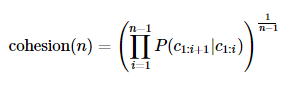

아직은 아리송할 거예요. '반포한강공원에'라는 7의 길이를 가진 문자 시퀀스에 대해서 각 내부 문자열의 스코어를 구하는 과정은 아래와 같습니다.

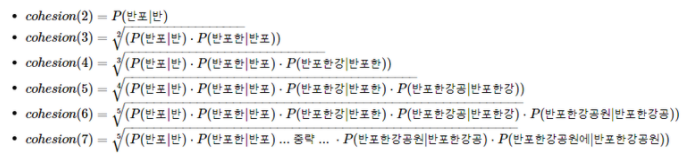

**각 case에 따른 응집 확률은 아래와 같습니다.**

In [53]:
word_score_table["반포한"].cohesion_forward

0.08838002913645132

In [54]:
word_score_table["반포한강"].cohesion_forward

0.19841268168224552

In [55]:
word_score_table["반포한강공"].cohesion_forward

0.2972877884078849

In [56]:
word_score_table["반포한강공원"].cohesion_forward

0.37891487632839754

In [57]:
word_score_table["반포한강공원에"].cohesion_forward

0.33492963377557666

응집 확률이 최대화가 되는 내부 문자열 구간은 '반포한강공원'입니다. 다시 말해 **'반포한강공원'이 하나의 단어일 확률이 높습니다.**

### soynlp의 브랜칭 엔트로피(branching entropy)

브랜칭 엔트로피(Branching Entropy) 는 확률 분포의 엔트로피값을 사용합니다. 이는 주어진 문자열에서 다음 문자가 등장할 수 있는 가능성을 판단하는 척도입니다. 이해를 위해 퀴즈를 내보겠습니다.

제가 어떤 단어를 생각 중인데, 한 문자씩 말해드릴 테니까 매번 다음 문자를 맞추어 보세요.

첫 번째 문자는 '디'입니다. 다음에 등장할 문자를 맞춰보세요. 솔직히 가늠이 잘 안 가지요? '디'로 시작하는 단어가 얼마나 많은데요. 이걸 어떻게 맞추냐구요. 정답은 '스' 입니다.

이제 '디스'까지 나왔네요. '디스' 다음 문자는 뭘까요? 벌써 정답 단어를 예측한 분도 있을 테고, 여전히 가늠이 잘 안 가시는 분도 있을 거예요. '디스카운트'라는 단어가 있으니까 '카'일까? 아니면 '디스코드'라는 단어가 있으니까 '코'인가? 생각해보니 '디스코'가 정답일 수도 있겠네요. 그러면 '코'인가? '디스아너드'라는 게임이 있으니까 '아'?

전부 땡땡땡! 이 단어들을 생각하신 분들은 전부 틀렸습니다. 정답은 '플'이었습니다.

'디스플'까지 왔습니다. 다음 문자를 맞춰보세요. 이제 좀 명백해지는군요. 이 정도 되면 헷갈리시는 분들은 거의 없을 거예요. 정답은 '레'입니다. '디스플레' 다음에는 어떤 문자일까요? 너무 명백해서 문제라고 보기도 어려워졌어요. 정답은 '이'입니다. 제가 생각한 단어는 '디스플레이'였습니다!

저는 지금 브랜칭 엔트로피를 시뮬레이션한 겁니다. 브랜칭 엔트로피를 주어진 문자 시퀀스에서 다음 문자 예측을 위해 헷갈리는 정도라고 비유해 봅시다. 브랜칭 엔트로피의 값은 하나의 완성된 단어에 가까워질수록 문맥으로 인해 정확히 예측할 수 있게 되므로 점차 줄어듭니다. 실습해 볼게요.

In [58]:
word_score_table["디스"].right_branching_entropy

1.6371694761537934

In [59]:
word_score_table["디스플"].right_branching_entropy

-0.0

In [60]:
word_score_table["디스플레"].right_branching_entropy

-0.0

여기서 '디스' 다음에는 다양한 문자가 올 수 있으니까 1.63이라는 값을 가지는 반면, '디스플'이라는 문자열 다음에는 다음 문자로 '레'가 오는 것이 너무나 명백하기 때문에 0이란 값을 가집니다. **그렇다면, 아래 결과는 어떻게 나올까요?**

In [61]:
word_score_table["디스플레이"].right_branching_entropy

3.1400392861792916

갑자기 값이 급증합니다. 그 이유는 문자 시퀀스 '디스플레이'라는 문자 시퀀스 다음에는 조사나 다른 단어가 나올 수 있는 다양한 경우가 있을 수 있기 때문입니다. 즉 하나의 단어가 끝나면 그 경계 부분부터 다시 브랜칭 엔트로피값이 증가함을 의미합니다. 그러면 이 값으로 단어를 판단하는 것이 가능하겠죠?

soynlp 패키지는 이렇게 계산한 점수를 사용해 두 가지 문자열 토큰화 방법을 제공합니다.

### soynlp의 LTokenizer

띄어쓰기 단위로 잘 나뉜 문장은 L 토크나이저(LTokenizer)를 사용하면 좋습니다.

한국어는 띄어쓰기 단위로 나눈 어절 토큰이 주로 L 토큰 + R 토큰의 형식을 가질 때가 많습니다. 예를 들어서 '공원에'는 '공원 + 에'로 나눌 수 있겠지요. 또는 '공부하는'은 '공부 + 하는'으로 나눌 수도 있을 것입니다. L 토크나이저는 L 토큰 + R 토큰으로 나누되, 점수가 가장 높은 L 토큰을 찾아내는 분리 기준을 가지고 있습니다.



In [62]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
l_tokenizer = LTokenizer(scores=scores)
l_tokenizer.tokenize("국제사회와 우리의 노력들로 범죄를 척결하자", flatten=False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척결', '하자')]

### 최대 점수 토크나이저 (MaxScoreTokenizer)

띄어쓰기가 되어 있지 않은 문장에서 점수가 높은 글자 시퀀스를 순차적으로 찾아내는 토크나이저입니다. 띄어쓰기가 되어 있지 않은 문장을 넣어서 토큰화된 결과를 점수를 통해 알아보겠습니다.

In [63]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']